<a href="https://colab.research.google.com/github/sohansputhran/Classifying-Indian-Classical-Dance-Form/blob/master/Classifying%20Indian%20Classical%20Dance%20Form.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
import random
from shutil import copyfile

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
train_path = "/content/drive/My Drive/Classical Dance Images/train/"
test_path = "/content/drive/My Drive/Classical Dance Images/test/"

labels = pd.read_csv("/content/drive/My Drive/Identifying Dance Form/train.csv")
t_labels = pd.read_csv("/content/drive/My Drive/Identifying Dance Form/test.csv")

In [ ]:
labels.head()

,Image,target
0,96.jpg,manipuri
1,163.jpg,bharatanatyam
2,450.jpg,odissi
3,219.jpg,kathakali
4,455.jpg,odissi


In [ ]:
labels.shape

(364, 2)

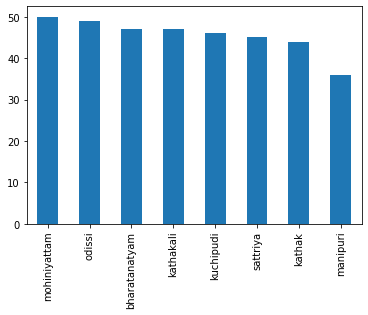

In [ ]:
labels['target'].value_counts().plot(kind='bar')

In [ ]:
# For creating subfolders

import shutil

for idx, values in labels.iterrows():
    target = values[1]
    image = values[0]
    path = os.path.join("/content/dataset/", str(target))
    if not os.path.exists(path):
        os.makedirs(path)
    shutil.copy(train_path + image, path)

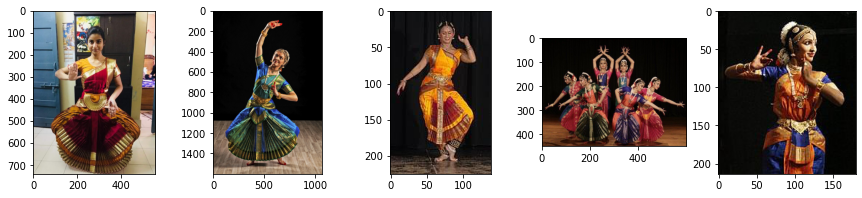

In [ ]:
import matplotlib.image as img
import os

fig,ax = plt.subplots(1,5,figsize = (15,3))

# To display images when subfolders were not created
for i,idx in enumerate(labels[labels.target == 'bharatanatyam']['Image'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

# i = 0
# for f in os.listdir(train_path + "bharatanatyam/"):
#     # img.imread(f)
#     if i == 5:  break
#     ax[i].imshow(img.imread(train_path + "bharatanatyam/" + f))
#     i += 1

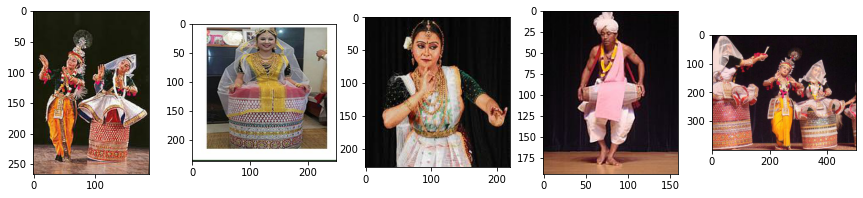

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (15,3))

# To display images when subfolders were not created
for i,idx in enumerate(labels[labels.target == 'manipuri']['Image'][-5:]):
    path = os.path.join(train_path,idx)
    ax[i].imshow(img.imread(path))

# i = 0
# fig,ax = plt.subplots(1,5,figsize = (15,3))

# for f in os.listdir(train_path + "manipuri/"):
#     # img.imread(f)
#     if i == 5:  break
#     ax[i].imshow(img.imread(train_path + "manipuri/" + f))
#     i += 1

In [ ]:
labels.target.unique()

array(['manipuri', 'bharatanatyam', 'odissi', 'kathakali', 'kathak',
       'sattriya', 'kuchipudi', 'mohiniyattam'], dtype=object)

In [ ]:
# !pip install split_folders

In [ ]:
# # For creating validation and train folders of the images randomly for training the model

# import split_folders

# split_folders.ratio('/content/dataset/', output="/content/", seed=1337, ratio=(.8, .2))

Text(0.5, 1.0, 'Number of training images per category:')

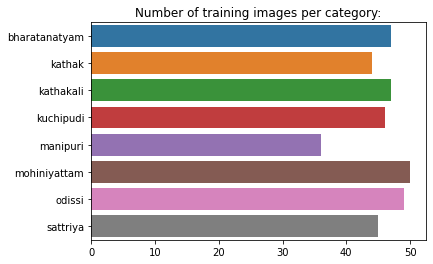

In [ ]:
import seaborn as sns

train_data_dir = "/content/drive/My Drive/Identifying Dance Form/training_files/"

category_names = sorted(os.listdir(train_data_dir))
nb_categories = len(category_names)
img_pr_cat = []
for category in category_names:
    folder = train_data_dir + category
    img_pr_cat.append(len(os.listdir(folder)))
sns.barplot(y=category_names, x=img_pr_cat).set_title("Number of training images per category:")

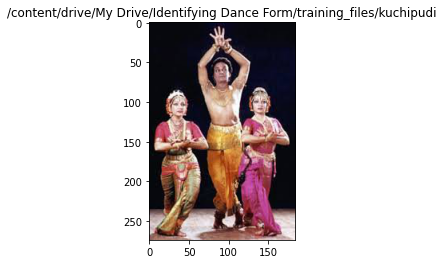

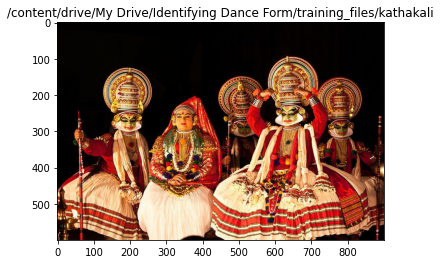

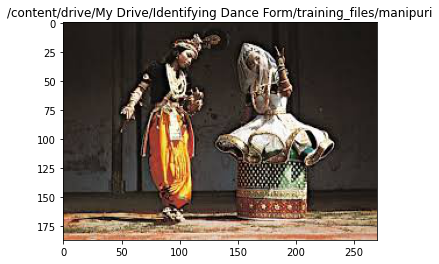

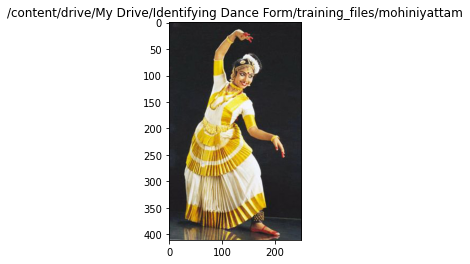

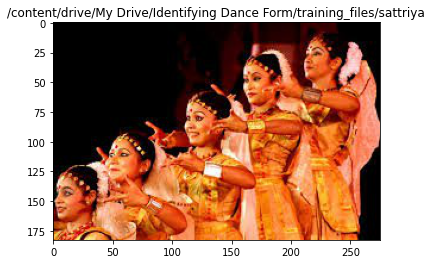

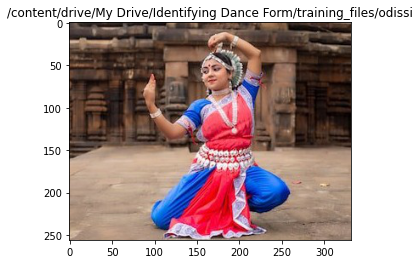

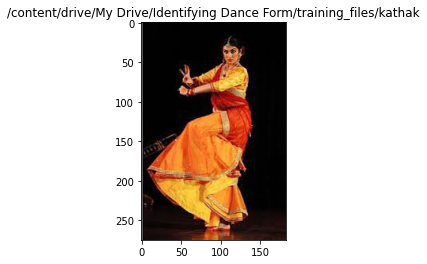

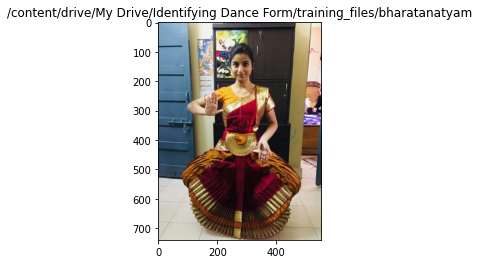

In [ ]:
for subdir, dirs, files in os.walk(train_data_dir):
    for file in files:
        img_file = subdir + '/' + file
        image = img.imread(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

In [ ]:
# from tensorflow.keras.applications.resnet50 import preprocess_input, ResNet50
from tensorflow.keras.applications.inception_resnet_v2   import preprocess_input, InceptionResNetV2

In [ ]:
import cv2

def load_data(df, path):
    images = []
    labels = []
    for i in zip(df.values):
        file = i[0][0]
        label = i[0][1]
        image = cv2.resize(cv2.imread(path+file), 
                           (256,256))
        image = preprocess_input(image)
        images.append(image)
        labels.append(label)
    return np.array(images), np.array(labels)

In [ ]:
image_path = train_path

X, y = load_data(labels, image_path)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

encoder = OneHotEncoder(sparse=False)
y_train = encoder.fit_transform(y_train.reshape(-1,1))
y_val = encoder.transform(y_val.reshape(-1,1))

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

data_gen = ImageDataGenerator(
                              rotation_range=40,
                              width_shift_range=0.25,
                              height_shift_range=0.25,
                              shear_range=0.2,
                              zoom_range=0.3,
                              horizontal_flip=True,
                              fill_mode='nearest'
                              )

data_gen.fit(X_train)

In [ ]:
num_classes = len(np.unique(y))

In [ ]:
from tensorflow.keras import layers, models, optimizers, callbacks, Sequential
from tensorflow.keras.layers import Flatten, Dense, BatchNormalization, Activation,Dropout, Conv2D, GlobalAveragePooling2D

In [ ]:
# x1 = layers.Dense(1024, activation='relu')(model.output)
# x1 = layers.Dropout(rate=0.2)(x1)
# x2 = layers.Dense(512, activation='relu')(x1)
# x2 = layers.Dropout(rate=0.2)(x2)
# x3 = layers.Dense(128, activation='relu')(x2)

# output = layers.Dense(num_classes, activation='softmax')(x2)

# model = models.Model(model.input, output)

# model.summary()

In [ ]:
def plot_graph(hist):
  plt.figure(figsize=(15,7))
  ax1 = plt.subplot(1,2,1)
  ax1.plot(hist.history['loss'], color='b', label='Training Loss') 
  ax1.plot(hist.history['val_loss'], color='r', label = 'Validation Loss',axes=ax1)
  legend = ax1.legend(loc='best', shadow=True)
  ax2 = plt.subplot(1,2,2)
  ax2.plot(hist.history['accuracy'], color='b', label='Training Accuracy') 
  ax2.plot(hist.history['val_accuracy'], color='r', label = 'Validation Accuracy')
  legend = ax2.legend(loc='best', shadow=True)

Epoch 1/30
5/4 [================================] - 9s 2s/step - loss: 2.1058 - accuracy: 0.1237 - val_loss: 2.0719 - val_accuracy: 0.1644 - lr: 1.0000e-04
Epoch 2/30
5/4 [================================] - 4s 841ms/step - loss: 2.0545 - accuracy: 0.1546 - val_loss: 2.0456 - val_accuracy: 0.1644 - lr: 1.0000e-04
Epoch 3/30
5/4 [================================] - 4s 838ms/step - loss: 2.0124 - accuracy: 0.2337 - val_loss: 1.9918 - val_accuracy: 0.1781 - lr: 1.0000e-04
Epoch 4/30
5/4 [================================] - 4s 807ms/step - loss: 1.9643 - accuracy: 0.2784 - val_loss: 1.9323 - val_accuracy: 0.2740 - lr: 1.0000e-04
Epoch 5/30
5/4 [================================] - 4s 803ms/step - loss: 1.8664 - accuracy: 0.3849 - val_loss: 1.8811 - val_accuracy: 0.3151 - lr: 1.0000e-04
Epoch 6/30
5/4 [================================] - 4s 803ms/step - loss: 1.7499 - accuracy: 0.3986 - val_loss: 1.8183 - val_accuracy: 0.3562 - lr: 1.0000e-04
Epoch 7/30
5/4 [================================]

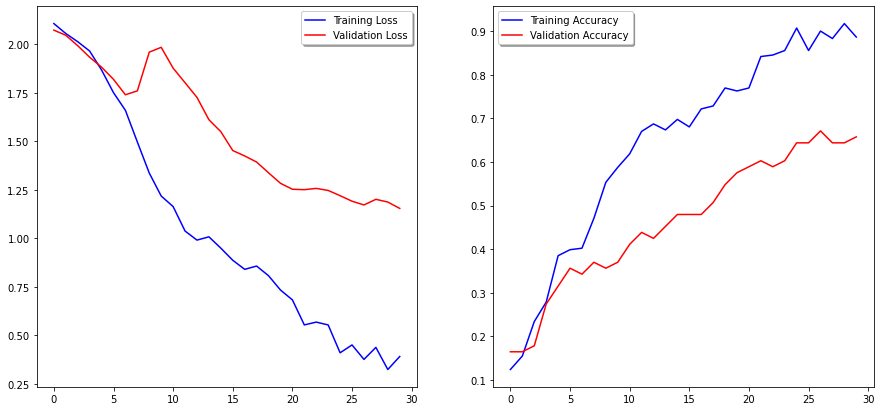

In [ ]:
lrs = [0.0001, 0.00001]
batch_sizes = [40,50,64]
freeze_layers = [10,20,30,40,50]
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 50, epoch = 30, score = 77.19
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 30, epoch = 30, score = 81.35
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 20, epoch = 30, score = 80.35
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 30, epoch = 25, score = 77.4
# highest pair: lr = 0.0001, batch_size = 50, freeze_layers = 30, epoch = 30, score = 81.925
# highest pair: lr = 0.0001, batch_size = 50, freeze_layers = 30, epoch = 35, score = 70.798
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 30, epoch = 35, score = 79.12
# highest pair: lr = 0.0001, batch_size = 50, freeze_layers = 30, epoch = 30, score = 82.649   85 15 training, test
# highest pair: lr = 0.0001, batch_size = 64, freeze_layers = 30, epoch = 30, score = 81.36    80 20 training, test    InceptionResNetV2


lr = lrs[0]
batch_size = batch_sizes[2]
freeze_layer = 30
epochs = 30

# for lr in lrs:

base_model = InceptionResNetV2(include_top=False, weights='imagenet', 
                    pooling='avg', input_shape = (256, 256, 3))

for layer in base_model.layers[:freeze_layer]:
  layer.trainable = False

model = Sequential()
model.add(base_model) 
model.add(Flatten()) 
model.add(Dense(1024, activation=('relu'),input_dim=512))
model.add(Dense(512,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(256,activation=('relu'))) 
model.add(Dropout(.3))
model.add(Dense(128,activation=('relu')))
model.add(Dropout(.2))
model.add(Dense(num_classes,activation=('softmax')))

model.compile(loss="categorical_crossentropy",
              optimizer=optimizers.Adam(lr = lr),
              metrics=['accuracy'])

lr_reduce = callbacks.ReduceLROnPlateau(monitor='val_loss', 
                                        patience=2, 
                                        verbose=1, 
                                        factor=0.5, 
                                        min_lr=0.00001)

model_checkpoint_callback = callbacks.ModelCheckpoint(filepath="/content/weights.h5",
                                                      save_weights_only=True,
                                                      monitor='val_loss',
                                                      mode='max',
                                                      save_best_only=True)

hist = model.fit(data_gen.flow(X_train, y_train, batch_size=batch_size),
                steps_per_epoch=len(X_train)/batch_size, epochs=epochs,
                validation_data=(X_val, y_val),
                callbacks = [lr_reduce, model_checkpoint_callback])
plot_graph(hist)  

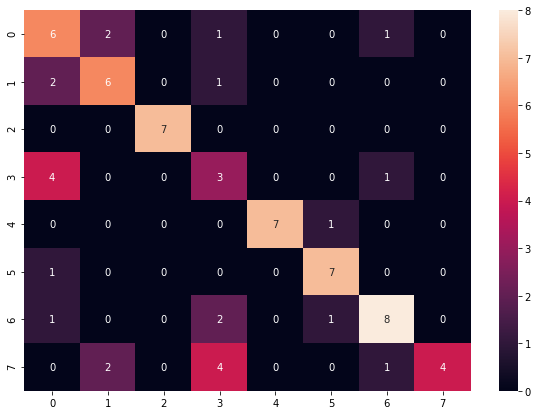

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(X_val)
cm = confusion_matrix(y_val.argmax(axis=1), y_pred.argmax(axis=1))

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True)

In [ ]:
def load_testdata(df, path):
    images = []
    for i in zip(df.values):
        file = i[0][0]
        image = cv2.resize(cv2.imread(path+file), 
                           (256,256))
        image = preprocess_input(image)
        images.append(image)
    return np.array(images)

In [ ]:
test_x = load_testdata(t_labels, test_path)

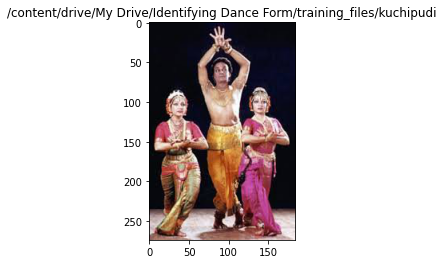

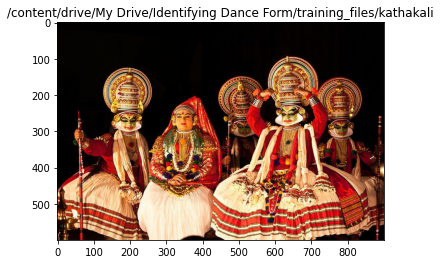

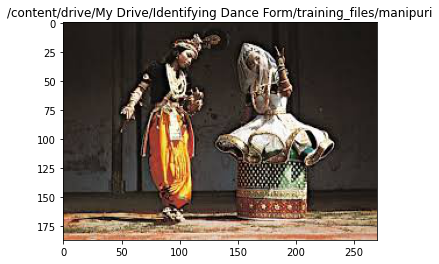

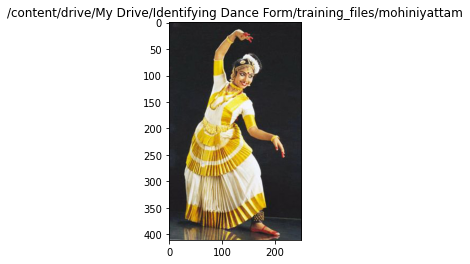

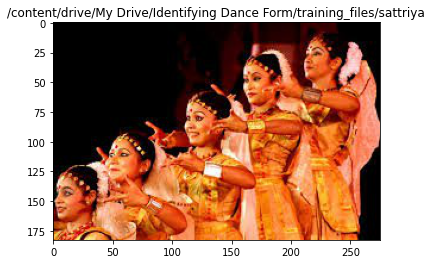

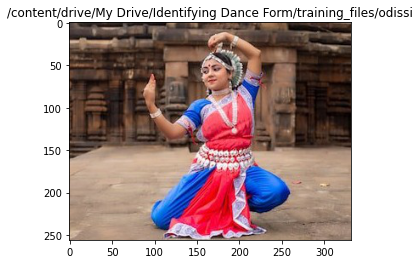

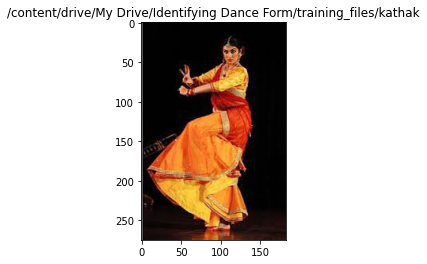

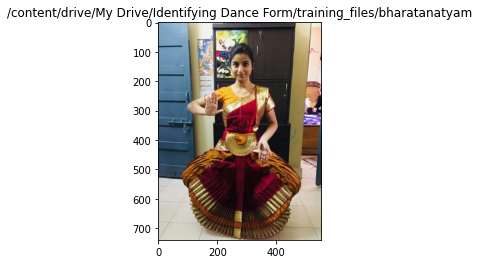

In [ ]:
for subdir, dirs, files in os.walk(train_data_dir):
    for file in files:
        img_file = subdir + '/' + file
        image = img.imread(img_file)
        plt.figure()
        plt.title(subdir)
        plt.imshow(image)
        break

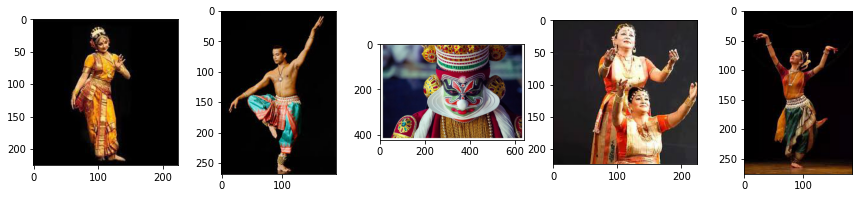

In [ ]:
fig,ax = plt.subplots(1,5,figsize = (15,3))

for i,idx in enumerate(t_labels['Image'][5:10]):
    path = os.path.join(test_path,idx)
    ax[i].imshow(img.imread(path))

In [ ]:
# model.load_weights("/content/weights.h5")
pred = model.predict(test_x)
pred[5:10]

array([[2.4387977e-01, 1.0812320e-02, 8.8735670e-04, 7.2640663e-01,
        1.5191339e-03, 2.7485569e-03, 9.3012331e-03, 4.4450061e-03],
       [5.3486192e-01, 2.9359272e-02, 2.7575477e-03, 2.9948887e-01,
        1.5046513e-03, 6.3893273e-03, 1.1462734e-01, 1.1011036e-02],
       [3.3088148e-05, 4.9736889e-05, 9.9512368e-01, 1.4785260e-04,
        2.6269749e-04, 3.9239542e-04, 3.9837225e-03, 6.8812260e-06],
       [5.4820968e-05, 2.5371232e-04, 4.0685063e-06, 3.4168884e-03,
        5.1952549e-04, 9.0739509e-04, 1.2623826e-03, 9.9358130e-01],
       [2.4616525e-01, 1.6062045e-02, 1.1016545e-03, 5.1712728e-01,
        4.3092639e-04, 4.9660075e-03, 2.0874526e-01, 5.4015289e-03]],
      dtype=float32)

In [ ]:
predicted_classes = np.argmax(pred,1)
predicted_classes[5:10]

array([3, 0, 2, 7, 3])

In [ ]:
classes = {0 : 'bharatanatyam',
 1 : 'kathak',
 2 : 'kathakali',
 3 : 'kuchipudi',
 4 : 'manipuri',
 5 : 'mohiniyattam',
 6 : 'odissi',
 7 : 'sattriya'}

predicted_classes = [classes[i] for i in predicted_classes]
predicted_classes[5:10]

['kuchipudi', 'bharatanatyam', 'kathakali', 'sattriya', 'kuchipudi']

In [ ]:
sol = pd.DataFrame({"Image" : t_labels.Image, "target" : predicted_classes})

In [ ]:
sol.to_csv("submission.csv", index = False)